# Exploratory Analysis

In [1]:
# Импортируем небходимые библиотеки для анализа данных
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Чтение и просмотр структуры данных (первые 5 строк таблицы)
dataframe = pd.read_csv('heart.csv')
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Сводная информация о датасете
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Пояснения к признакам

- ChestPainType - тип боли в груди:
ТА - типичная стенокардия
АТА - атипичная стенокардия
NAP - неангинальная боль
ASY - бессимптомная

- RestingBP - кровяное давление в состоянии покоя

- FastingBS - уровень сахара в крови натощак

- RestingECG - результаты электрокардиограммы в состоянии покоя: Normal, ST, LVH

- ExersizeAngina - стенокардия, вызванная физическими нагрузками 

- ST_Slope - наклон сегмента ST пикового упражнения

In [4]:
# Разделим все переменные на 3 типа: числовой, категориальный, целевой
target = ['HeartDisease']
categorical = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
numerical = dataframe.drop(labels=target + categorical, axis=1).columns.to_list()

print(f"Numerical: {numerical}\nCategorical: {categorical}\n\nTarget: {target}")

Numerical: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Categorical: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

Target: ['HeartDisease']


In [5]:
# Перекодируем переменные "Sex" и "ExerciseAngina" в числа 0 или 1 - это бинарные признаки
dataframe = dataframe.replace({'Sex': {'M': 1, 'F': 0}, 'ExerciseAngina': {'N': 0, 'Y': 1}})

In [6]:
# Выведем основные статистические показатели данных
dataframe.describe().round(decimals=3)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000,918.000,918.000,918.000,918.000,918.000,918.000,918.000,918.000
mean,53.511,0.790,132.397,198.800,0.233,136.809,0.404,0.887,0.553
std,9.433,0.408,18.514,109.384,0.423,25.460,0.491,1.067,0.497
min,28.000,0.000,0.000,0.000,0.000,60.000,0.000,-2.600,0.000
25%,47.000,1.000,120.000,173.250,0.000,120.000,0.000,0.000,0.000
50%,54.000,1.000,130.000,223.000,0.000,138.000,0.000,0.600,1.000
75%,60.000,1.000,140.000,267.000,0.000,156.000,1.000,1.500,1.000
max,77.000,1.000,200.000,603.000,1.000,202.000,1.000,6.200,1.000


In [7]:
# Выведем корреляционную матрицу
corr_matrix = dataframe.corr()
corr_matrix.style.background_gradient().format(precision=3)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
Age,1.000,0.056,0.254,-0.095,0.198,-0.382,0.216,0.259,0.282
Sex,0.056,1.000,0.005,-0.200,0.120,-0.189,0.191,0.106,0.305
RestingBP,0.254,0.005,1.000,0.101,0.070,-0.112,0.155,0.165,0.108
Cholesterol,-0.095,-0.200,0.101,1.000,-0.261,0.236,-0.034,0.050,-0.233
FastingBS,0.198,0.120,0.070,-0.261,1.000,-0.131,0.060,0.053,0.267
MaxHR,-0.382,-0.189,-0.112,0.236,-0.131,1.000,-0.370,-0.161,-0.400
ExerciseAngina,0.216,0.191,0.155,-0.034,0.060,-0.370,1.000,0.409,0.494
Oldpeak,0.259,0.106,0.165,0.050,0.053,-0.161,0.409,1.000,0.404
HeartDisease,0.282,0.305,0.108,-0.233,0.267,-0.400,0.494,0.404,1.000


In [8]:
# Установим единый размер шрифта на графиках
plt.rcParams.update({'font.size':14})

# Функции для построения гистограмм

def distribution_num_features(df, num_features, save_fig=True):
    plt.figure(figsize=(15, 15))
    plt.suptitle('Distribution of numerical features')
    for i, col in enumerate(df[num_features].columns, 1):
        plt.subplot(3,2,i)
        plt.title(f"Distribution of {col} Data")
        sns.histplot(df[col])
        plt.tight_layout()
        plt.plot()
    if save_fig:
        plt.savefig('distribution_num_features.png')

def distribution_cat_features(df, cat_features, save_fig=True):
    plt.figure(figsize=(15, 15))
    plt.suptitle('Distribution of categorical features')
    for i, col in enumerate(df[cat_features].columns, 1):
        plt.subplot(3,2,i)
        plt.title(f"Distribution of {col} Data")
        sns.histplot(df[col])
        plt.tight_layout()
        plt.plot()
    if save_fig:
        plt.savefig('distribution_cat_features.png')

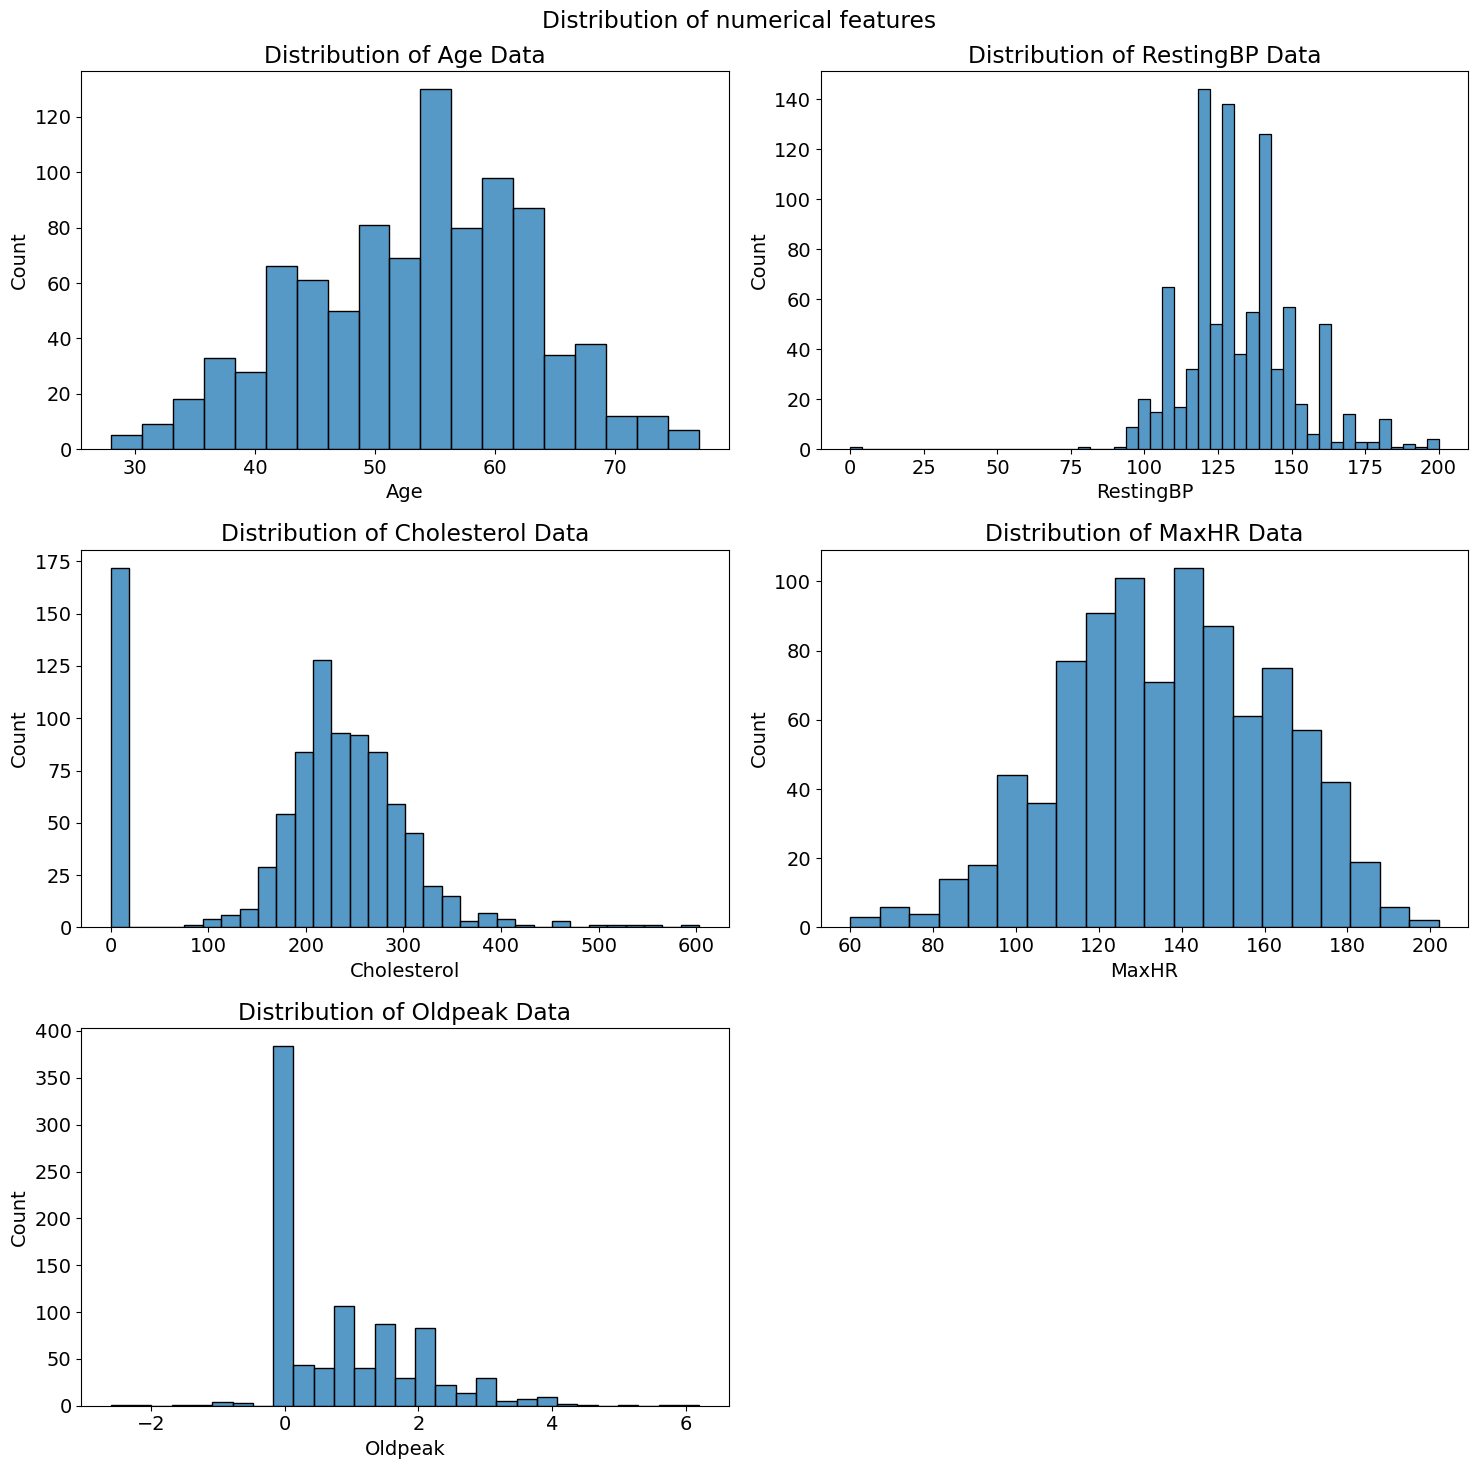

In [9]:
# Построим гистограмы распределения числовых признаков
distribution_num_features(dataframe, numerical)

По виду гистограмм заключаем, что числовые признаки RestingBP, Cholesterol, Oldpeak скорее всего имеют выбросы.
От выбросов необходимо избавиться, так как они влекут за собой искажение данных.

In [10]:
# Поиск выбросов по конкретному числовому признаку
def outliers_indicies(df: pd.DataFrame, feature: str, print_info=False):
    mean = df[feature].mean()
    std = df[feature].std()
    if print_info:
        print(f'Признак {feature}, диапазон 3-сигм: [{mean - 3*std :.3f}, {mean + 3*std :.3f}]')

    # условие того, что точка данных - выброс
    condition = (df[feature] < mean - 3*std) | (df[feature] > mean + 3*std)
    return df[condition].index

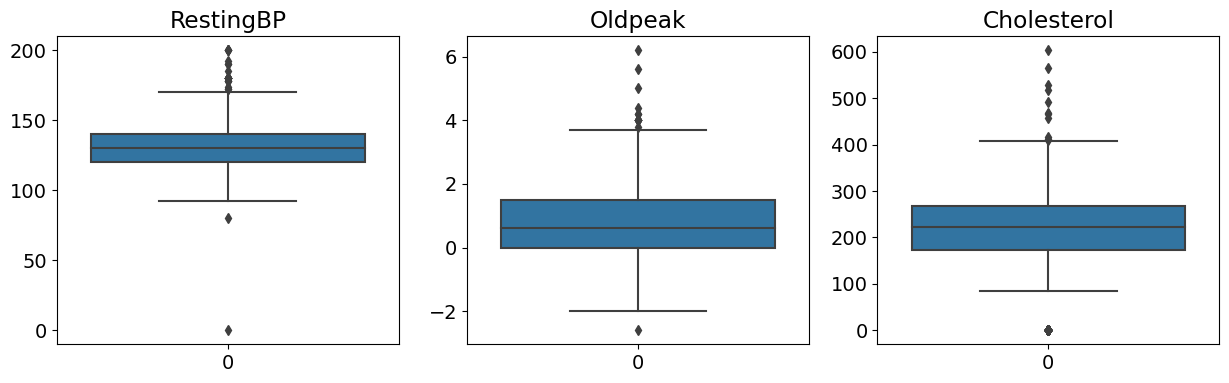

In [11]:
# Построим box-графики признаков, которые предположительно содержат выбросы
plt.figure(figsize=(15, 4))
cols = ['RestingBP', 'Oldpeak', 'Cholesterol']
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    plt.title(col)
    sns.boxplot(dataframe[col])
plt.savefig('features_with_outliers.png')

In [12]:
outliers_restingBP = outliers_indicies(dataframe, 'RestingBP', print_info=True)
outliers_cholesterol = outliers_indicies(dataframe, 'Cholesterol', print_info=True)
outliers_oldpeak = outliers_indicies(dataframe, 'Oldpeak', print_info=True)

all_outliers = set(outliers_restingBP) | set(outliers_cholesterol) | set(outliers_oldpeak)
print(f'Всего выбросов: {len(all_outliers)}')
dataframe.drop(index=all_outliers, inplace=True)

Признак RestingBP, диапазон 3-сигм: [76.854, 187.939]
Признак Cholesterol, диапазон 3-сигм: [-129.353, 526.952]
Признак Oldpeak, диапазон 3-сигм: [-2.312, 4.087]
Всего выбросов: 18


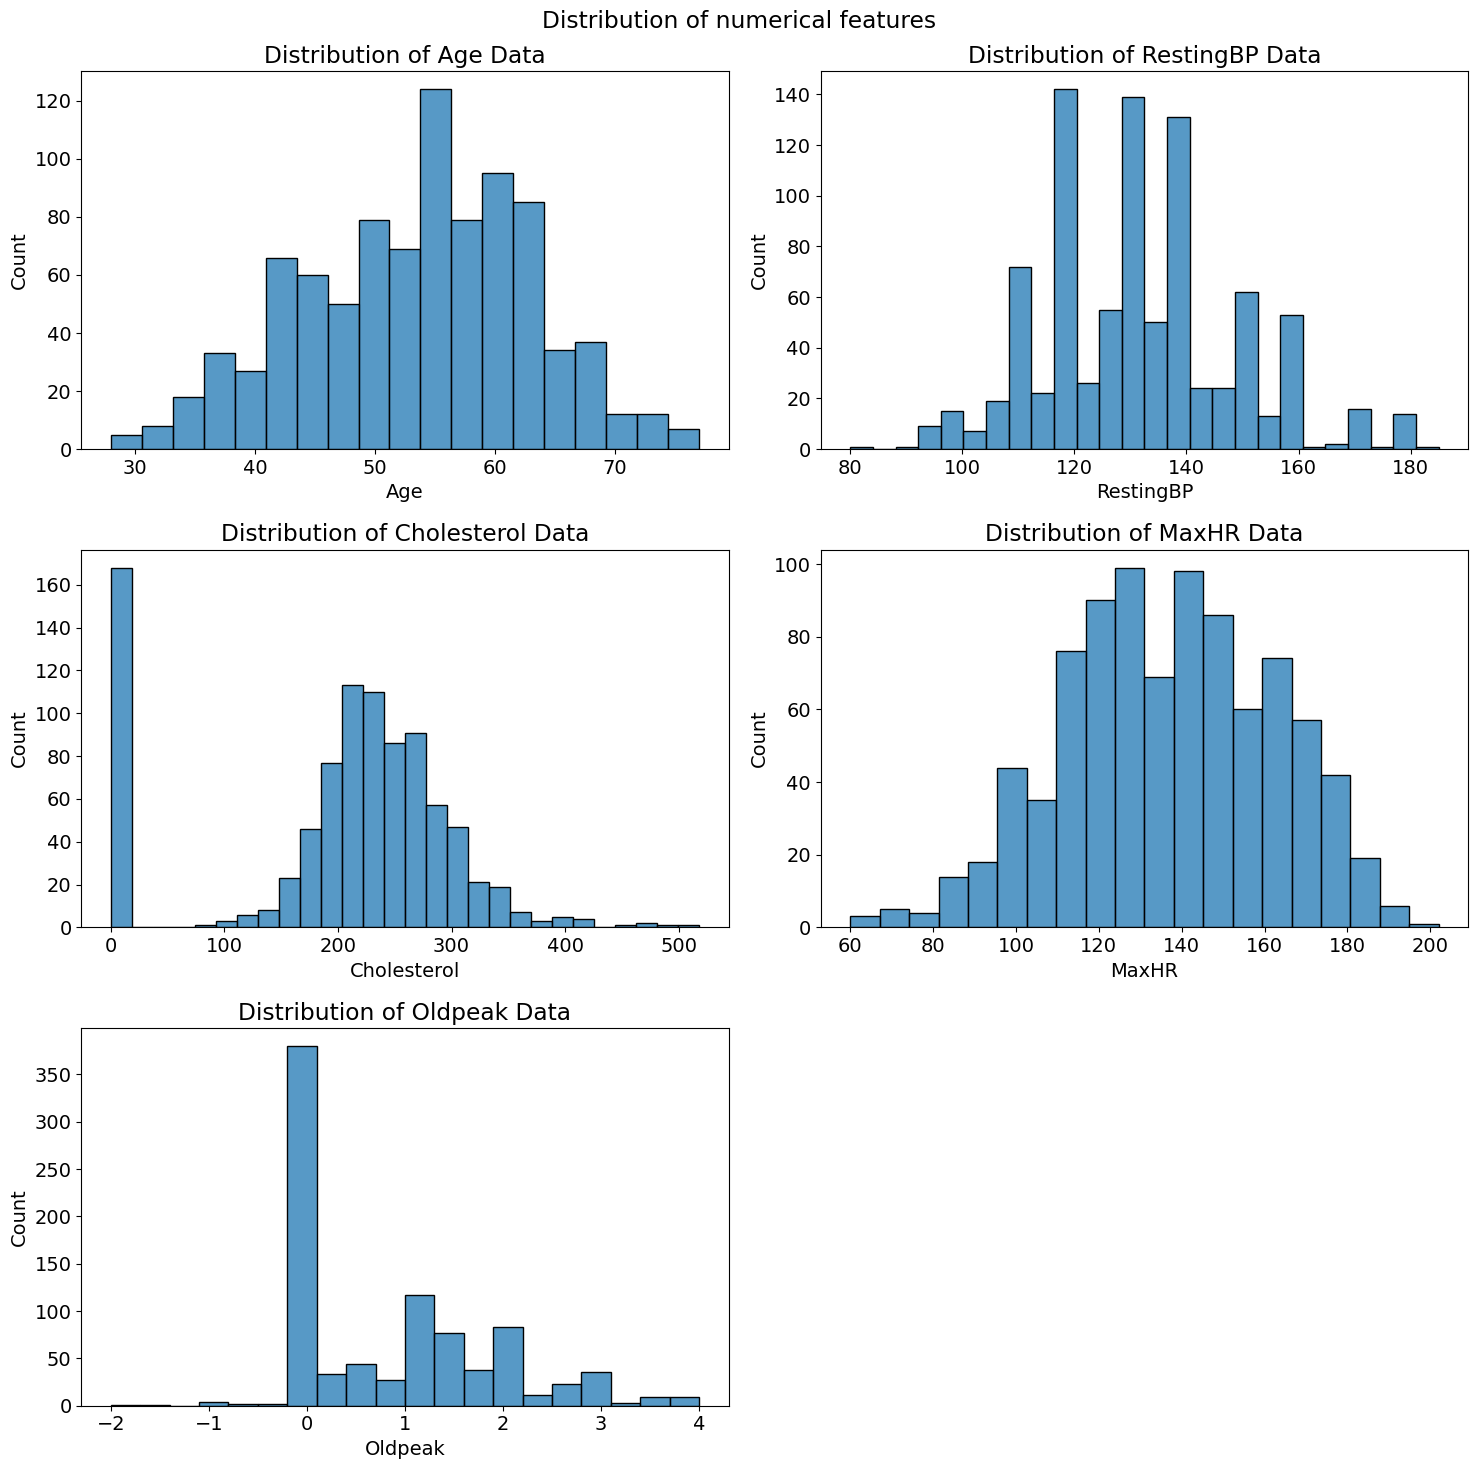

In [13]:
# Распределение числовых признаков после удаления выбросов
distribution_num_features(dataframe, numerical)

In [14]:
# Корреляционная матрица после удаления выбросов
corr_matrix = dataframe.corr()
corr_matrix.style.background_gradient().format(precision=3)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
Age,1.000,0.066,0.270,-0.095,0.200,-0.392,0.217,0.262,0.286
Sex,0.066,1.000,0.018,-0.207,0.122,-0.189,0.196,0.126,0.310
RestingBP,0.270,0.018,1.000,0.105,0.065,-0.113,0.151,0.156,0.111
Cholesterol,-0.095,-0.207,0.105,1.000,-0.271,0.239,-0.039,0.034,-0.240
FastingBS,0.200,0.122,0.065,-0.271,1.000,-0.127,0.057,0.072,0.267
MaxHR,-0.392,-0.189,-0.113,0.239,-0.127,1.000,-0.376,-0.174,-0.407
ExerciseAngina,0.217,0.196,0.151,-0.039,0.057,-0.376,1.000,0.424,0.497
Oldpeak,0.262,0.126,0.156,0.034,0.072,-0.174,0.424,1.000,0.418
HeartDisease,0.286,0.310,0.111,-0.240,0.267,-0.407,0.497,0.418,1.000


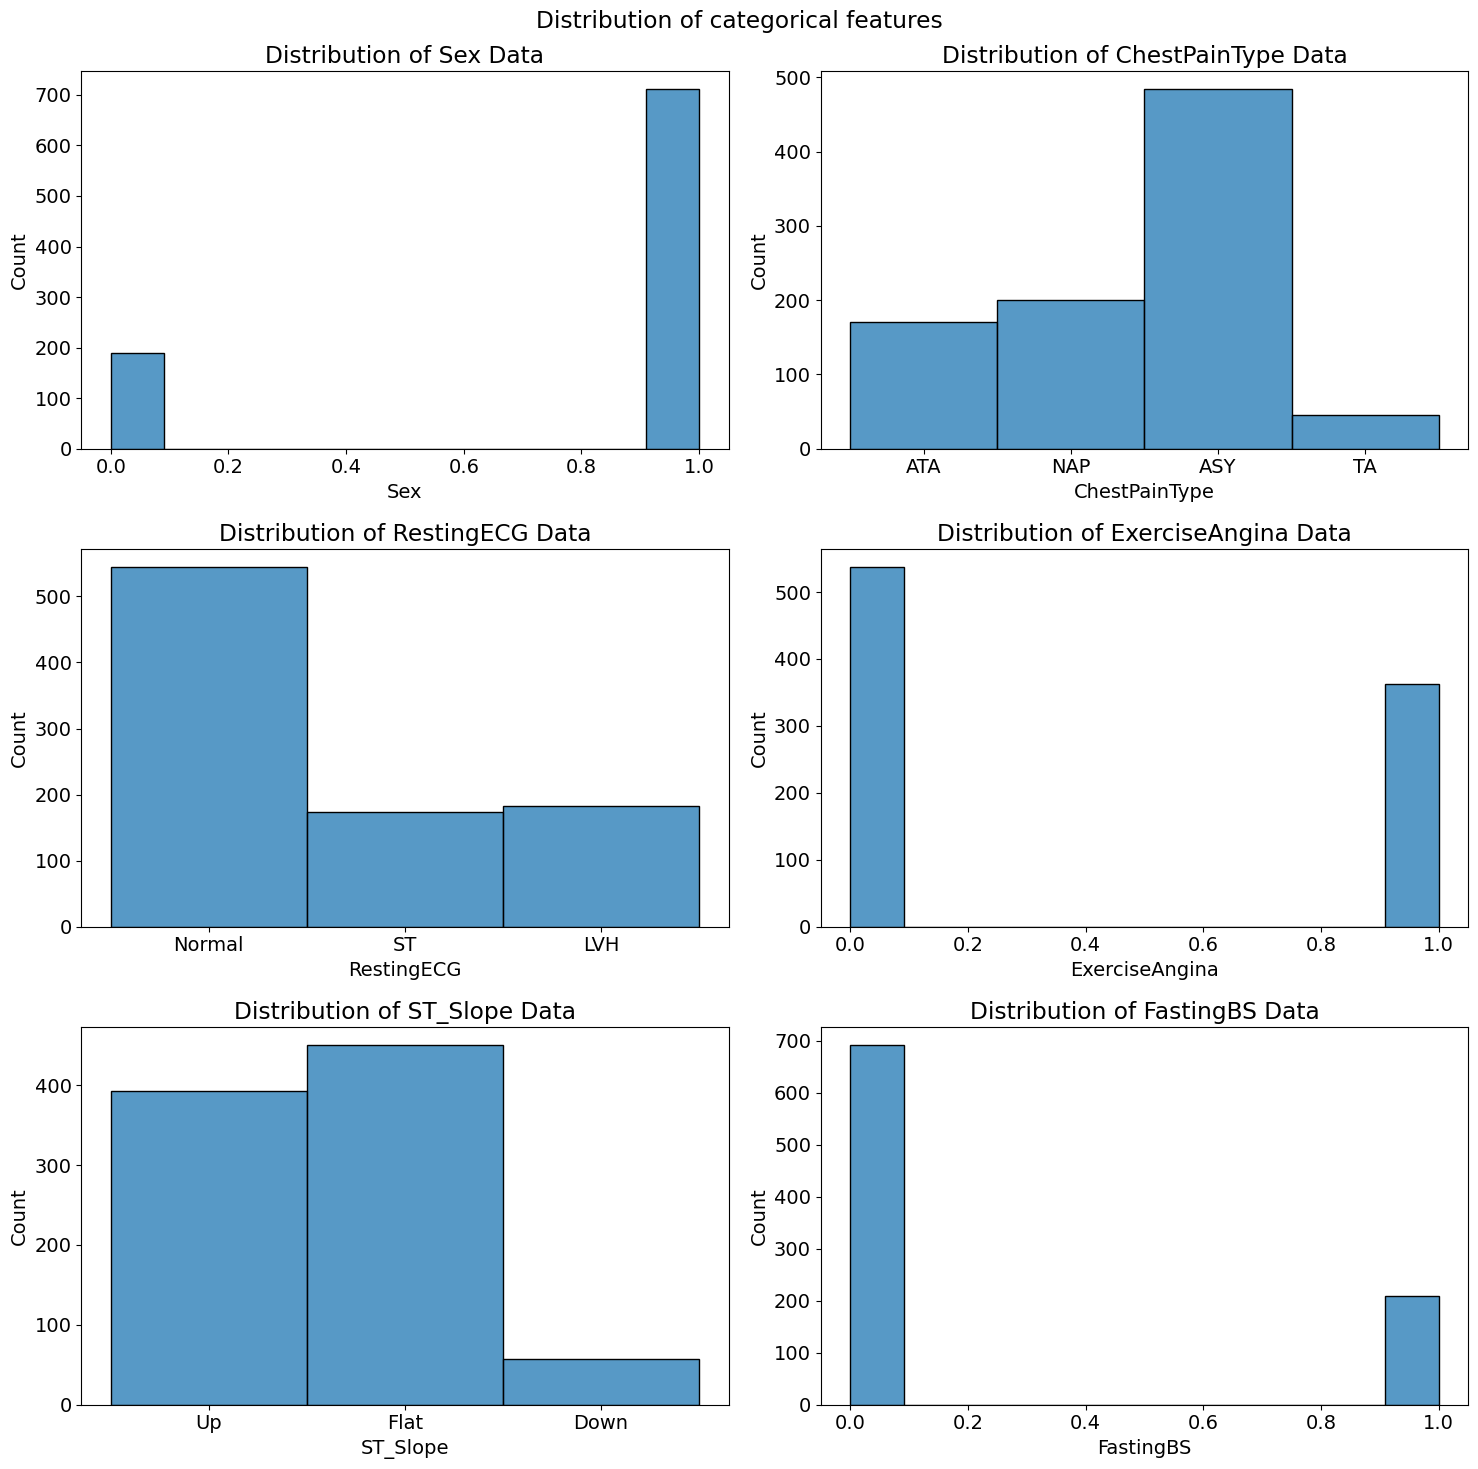

In [15]:
# Построим гистограмы распределения категориальных признаков
distribution_cat_features(dataframe, categorical)

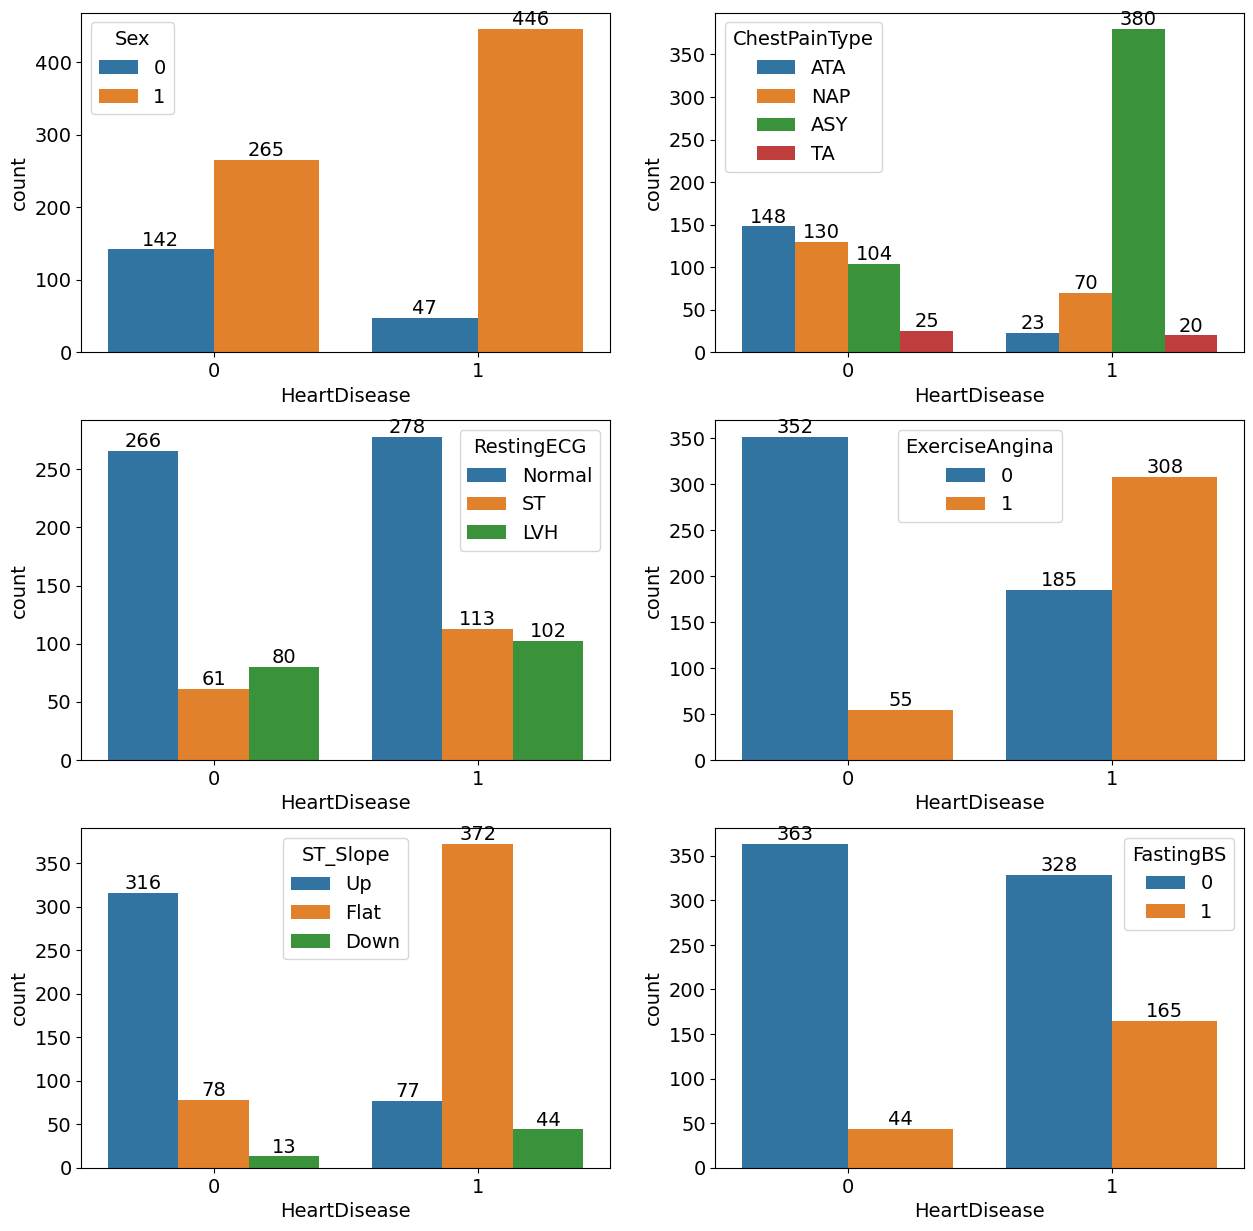

In [16]:
# Построим гистограммы распределения каждого категориального признака в зависимости от целевого признака HeartDisease
plt.figure(figsize=(15, 15))

for i, col in enumerate(categorical, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(data=dataframe, x='HeartDisease', hue=col)

    for label in ax.containers:
        ax.bar_label(label)
plt.savefig('cat_features_groupby_heartdisease.png')

In [17]:
# Займёмся анализом значимости категориальных признаков
# pointbiserialr - бисериальный к-т корреляции, оценивает связь между бинарным и числовым признаками
from scipy.stats import fisher_exact, chi2_contingency, pointbiserialr

In [18]:
# Критерий V Крамера
def cramers_v(df: pd.DataFrame, xlabel: str, ylabel: str, print_matrix=True):
    # from 0 to 1

    # x: pd.Series
    # y: pd.Series

    # sqrt( (chi2 / n) / min(k-1, r-1) )
    # n - grand total of observations
    # k - number of columns
    # r - number of rows
    
    confusion_matrix = pd.crosstab(df[xlabel], df[ylabel])
    chi2, pvalue = chi2_contingency(confusion_matrix)[:2] # value of chi2
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    if print_matrix:
        print(confusion_matrix)

    return np.sqrt(phi2 / min(k-1, r-1)), pvalue

In [19]:
for feature in categorical:
    # criteria, pvalue = cramers_v(dataframe, feature, 'HeartDisease')
    # print(f'criteria = {criteria}, pvalue = {pvalue}\n')
    confusion_matrix = pd.crosstab(dataframe[feature], dataframe['HeartDisease'])
    chi2, pvalue = chi2_contingency(confusion_matrix)[:2]
    print(confusion_matrix)
    print(f'chi2 = {chi2}, pvalue = {pvalue}\n')

HeartDisease    0    1
Sex                   
0             142   47
1             265  446
chi2 = 84.87817632809544, pvalue = 3.173263739498517e-20

HeartDisease     0    1
ChestPainType          
ASY            104  380
ATA            148   23
NAP            130   70
TA              25   20
chi2 = 261.48808876346294, pvalue = 2.1423993796374233e-56

HeartDisease    0    1
RestingECG            
LVH            80  102
Normal        266  278
ST             61  113
chi2 = 10.34092018687718, pvalue = 0.005681953987984134

HeartDisease      0    1
ExerciseAngina          
0               352  185
1                55  308
chi2 = 220.04831361042943, pvalue = 8.827651221002139e-50

HeartDisease    0    1
ST_Slope              
Down           13   44
Flat           78  372
Up            316   77
chi2 = 349.2569450600609, pvalue = 1.444834146570383e-76

HeartDisease    0    1
FastingBS             
0             363  328
1              44  165
chi2 = 62.92928023655695, pvalue = 2.1426320877937

In [20]:
for feature in ['Sex', 'ExerciseAngina', 'FastingBS']:
    crosstab = pd.crosstab(dataframe[feature], dataframe['HeartDisease'])
    print(crosstab)
    print(fisher_exact(crosstab), end='\n\n')

HeartDisease    0    1
Sex                   
0             142   47
1             265  446
SignificanceResult(statistic=5.084865515857086, pvalue=8.123345004279794e-21)

HeartDisease      0    1
ExerciseAngina          
0               352  185
1                55  308
SignificanceResult(statistic=10.655135135135135, pvalue=1.2400210736753246e-53)

HeartDisease    0    1
FastingBS             
0             363  328
1              44  165
SignificanceResult(statistic=4.1501524390243905, pvalue=2.1563232433789856e-16)



In [21]:
# Удалим переменную RestingECG
dataframe.drop('RestingECG', axis=1, inplace=True)
categorical.remove('RestingECG')

In [22]:
# Преобразуем категориальные колонки в численные
categorical.remove('Sex')
categorical.remove('ExerciseAngina')
df = pd.get_dummies(dataframe, columns=categorical, drop_first=False)
categorical.extend(['Sex', 'ExerciseAngina'])
df

,Age,Sex,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_0,FastingBS_1
0,40,1,140,289,172,0,0.0,0,0,1,0,0,0,0,1,1,0
1,49,0,160,180,156,0,1.0,1,0,0,1,0,0,1,0,1,0
2,37,1,130,283,98,0,0.0,0,0,1,0,0,0,0,1,1,0
3,48,0,138,214,108,1,1.5,1,1,0,0,0,0,1,0,1,0
4,54,1,150,195,122,0,0.0,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,132,0,1.2,1,0,0,0,1,0,1,0,1,0
914,68,1,144,193,141,0,3.4,1,1,0,0,0,0,1,0,0,1
915,57,1,130,131,115,1,1.2,1,1,0,0,0,0,1,0,1,0
916,57,0,130,236,174,0,0.0,1,0,1,0,0,0,1,0,1,0


In [23]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Logistic Regression

In [24]:
# Разделение на тренировочную и валидационную выборки
# Нормализация данных

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

Перебрать различные параметры логистической регрессии

- penalty: l1, l2, elasticnet
- solver

Accuracy:  0.8833333333333333
ROC AUC:  0.8815937149270483


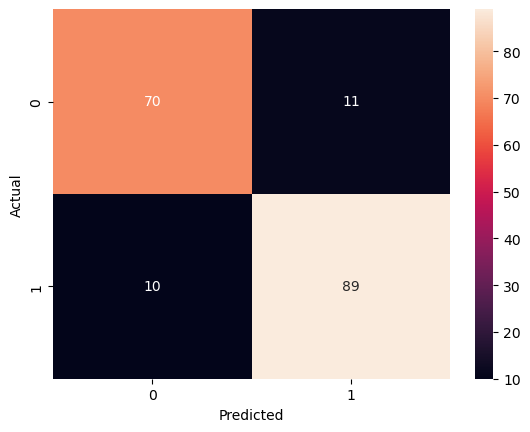

In [25]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

clf = LogisticRegression(penalty='l2', solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print("Accuracy: ", accuracy_score(y_val, y_pred))
print("ROC AUC: ", roc_auc_score(y_val, y_pred))

conf_matrix = confusion_matrix(y_val, y_pred)
ax = sns.heatmap(conf_matrix, annot=True)
ax.set(xlabel='Predicted', ylabel='Actual')
plt.show()

# TN FP
# FN TP

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LogisticRegression(), [
    {'penalty': ['l1', 'l2', 'none'],
     'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga']
    }],
    cv=5)

grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

In [38]:
from sklearn import model_selection
from sklearn.metrics import classification_report

acc_log=[]

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=X, y=y)):
    
    X_train=X.iloc[trn_]
    y_train=y.iloc[trn_]
    
    X_valid=X.iloc[val_]
    y_valid=y.iloc[val_]

    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    acc = roc_auc_score(y_valid, y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.93      0.84      0.88        98

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180

The accuracy for Fold 1 : 0.8817819810851171
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.90      0.78      0.84        98

    accuracy                           0.83       180
   macro avg       0.84      0.84      0.83       180
weighted avg       0.84      0.83      0.83       180

The accuracy for Fold 2 : 0.8389746142359383
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.78        81
           1       0.78      0.98      0.87        99

    accuracy                       

# Neural Network

In [27]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import network
from network import HeartDataset, NeuralNetwork

c:\anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

train_dataset = HeartDataset(X_train, y_train)
val_dataset = HeartDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

n_features = X_train.shape[1]
num_epochs = 200
learning_rate = 0.01

In [30]:
model = NeuralNetwork(n_features)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()
print(model)

NeuralNetwork(
  (main): Sequential(
    (0): Linear(in_features=16, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=50, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [31]:
log_dict = network.train(model, num_epochs, train_loader, optimizer, loss_fn, val_loader)

Epoch 10:	Loss 0.6209664252069261, Accuracy 0.8385416666666666
Epoch 20:	Loss 0.4484242081642151, Accuracy 0.8854166666666666
Epoch 30:	Loss 0.4090597106350793, Accuracy 0.84375
Epoch 40:	Loss 0.41229038768344456, Accuracy 0.859375
Epoch 50:	Loss 0.3956514199574788, Accuracy 0.875
Epoch 60:	Loss 0.36789341304037304, Accuracy 0.859375
Epoch 70:	Loss 0.3704454074303309, Accuracy 0.875
Epoch 80:	Loss 0.36192410488923393, Accuracy 0.859375
Epoch 90:	Loss 0.35658258282476, Accuracy 0.875
Epoch 100:	Loss 0.36290166907840304, Accuracy 0.875
Epoch 110:	Loss 0.33994658258226185, Accuracy 0.875
Epoch 120:	Loss 0.33904228839609357, Accuracy 0.875
Epoch 130:	Loss 0.35022574646605387, Accuracy 0.875
Epoch 140:	Loss 0.3476805658804046, Accuracy 0.875
Epoch 150:	Loss 0.34865187803904213, Accuracy 0.859375
Epoch 160:	Loss 0.3362630209989018, Accuracy 0.859375
Epoch 170:	Loss 0.35077049136161803, Accuracy 0.859375
Epoch 180:	Loss 0.35314269098970624, Accuracy 0.8697916666666666
Epoch 190:	Loss 0.332646

Mean Loss: 0.3846295767202973
Mean Accuracy: 0.8651041666666669


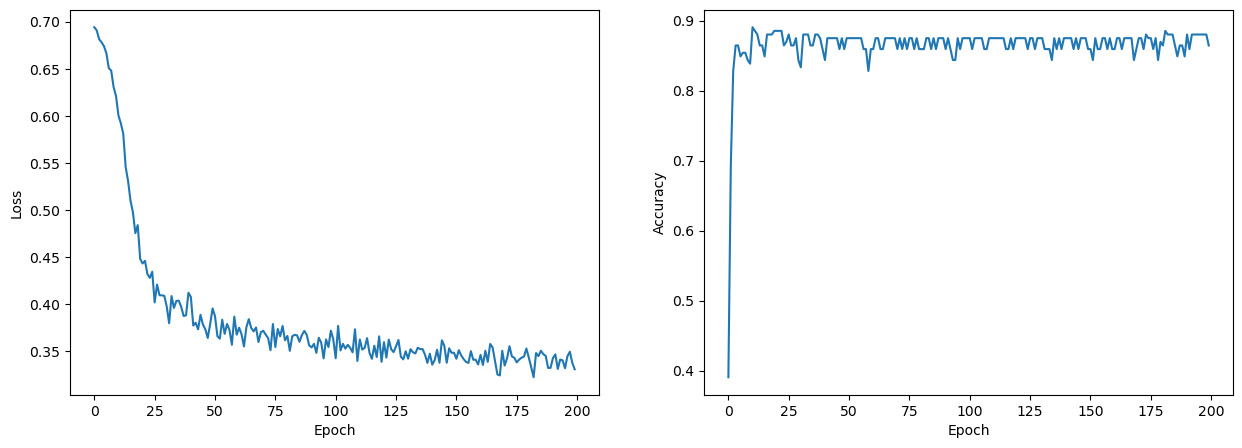

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(log_dict['losses_per_epoch'])
axes[0].set(xlabel='Epoch', ylabel='Loss')
axes[1].plot(log_dict['accuracy_per_epoch'])
axes[1].set(xlabel='Epoch', ylabel='Accuracy')

print("Mean Loss:", np.mean(log_dict['losses_per_epoch']))
print("Mean Accuracy:", np.mean(log_dict['accuracy_per_epoch']))

Accuracy:  0.8722222222222222
ROC AUC:  0.8680555555555555


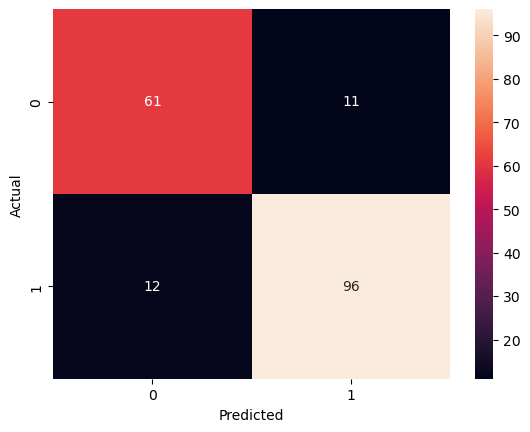

In [35]:
with torch.no_grad():
    prediction = model(torch.FloatTensor(X_val))
    prediction = prediction.view(-1).detach().numpy().round()
print('Accuracy: ', accuracy_score(y_val, prediction))
print('ROC AUC: ', roc_auc_score(y_val, prediction))
conf_matrix = confusion_matrix(y_val, prediction)
ax = sns.heatmap(conf_matrix, annot=True)
ax.set(xlabel='Predicted', ylabel='Actual')
plt.show()